# Forecasting Weather with Neural Prophet

## Autor

* Esponda Chaux, Sebastian : sebasespon11@gmail.com
* Personal Profile:  [GitHub Profile]( https://github.com/Sebasespon)

## Introducción

En el siguiente proyecto se realizará un forecasting de la temperatura de algunas ciudad de Australia.

Para ello se utilizarán datos historicas de la temperatura en Australia desde 2015- 2020, se escogerán algunas ciudades para las predicciones y entrenará un modelo con la libreria Prophet de Facebook. 

Es una libreria de código abierto diseñada para realizar pronósticos para conjuntos de datos de series de tiempo univariantes.

Finalmente, una vez entrenado el modelo se realizarán predicciones del tiempo.

###  Australia





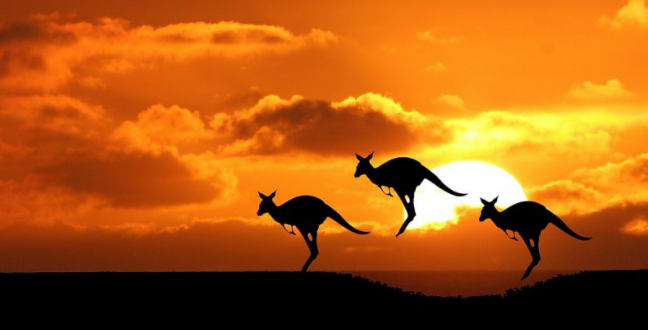

## Neural Prophet Facebook
* El forecasting utilizando la red neuronal Prophet es un modelo híbrido (Lineal - Red Neuronal).

* Esta basado en Pytorch paquete de Python empleado para Deep Learning.

* Es un modelo facil de emplear pues no requiere una gran cantidad de código.

* Otra gran ventaja de este modelo es que los datos son normalizados automaticamente y en cuanto a la visualización,
  se puede graficar predicciones futuras y pasadas para ver una comparativa de como funciona el modelo.
  
* Asi como también interpretar los parametros y obtener su descomposicion de manera gráfica.


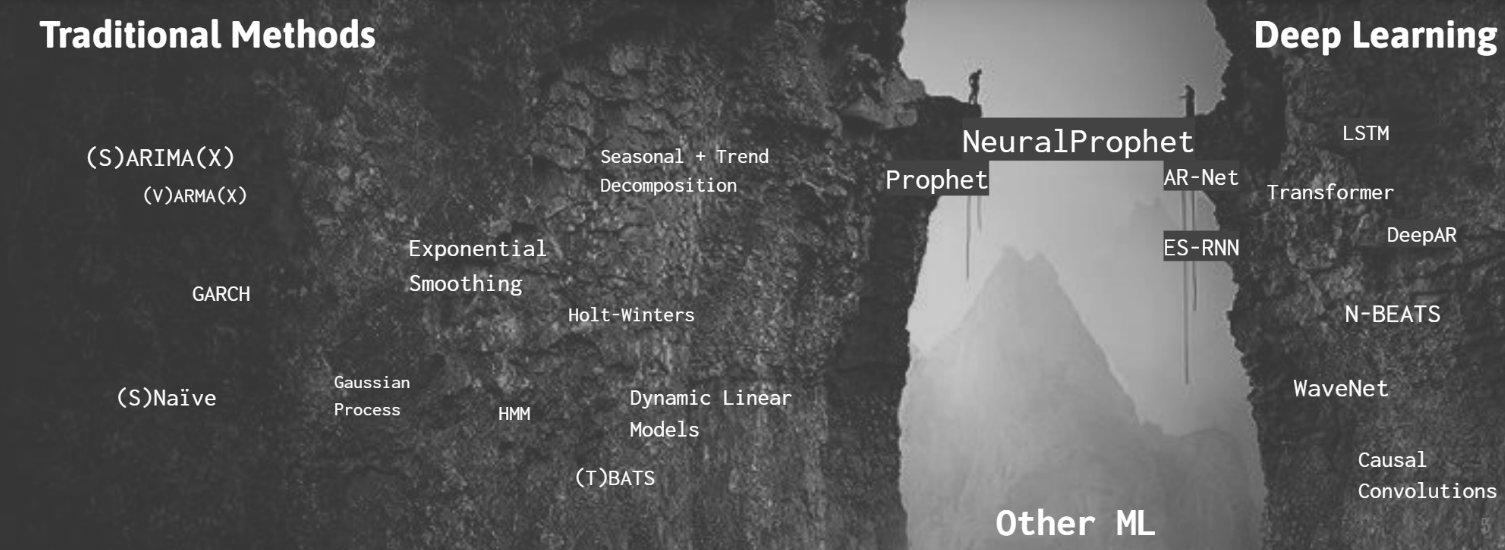


## Libraries

In [1]:
# Data processing
import pandas as pd

# Data viz
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set_style('darkgrid')
# Prophet Neural
from neuralprophet import NeuralProphet

# Hide system warnings
import sys
import warnings
warnings.filterwarnings("ignore")

# Save models
import pickle

# Data Loading and Preprocessing



In [2]:
# Data Loading 
data = pd.read_csv('weatherAus.csv')

In [3]:
# Shape of dataset
tamaño = data.shape

print('El dataset tiene ',tamaño[0] , 'filas y' , tamaño[1], 'columnas' )

El dataset tiene  142193 filas y 24 columnas


In [4]:
# Initial Inspection 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm        RISK_MM  
count  88536.000000  85099.000000  141289.000000  139467.000000  142193.000000  
mean       4.437189      4.503167      16.987509      21.687235       2.360682  
std        2.887016      2.720633       6.492838       6.937594       8.477969  
min        0.000000      0.000000      -7.200000      -5.400000       0.000000  
25%        1.000000      2.000000      12.300000      16.600000       0.000000  
50%        5.000000      5.000000      16.700000      21.100000       0.000000  
75%        7.000000      7.000000      21.600000      26.400000       0.800000  
max        9.000000      9.000000      40.200000      46.700000     371.000000

El conjunto de datos tiene variables númericas importantes como la MinTemp(Temperatura mínima), Rainfall (la lluvia)
la presión atmosferica, y la temperatura a las 9 am y 3pm.

Podemos ver como la temperatura media en Australia a las 9 am es de 16.98 grados y a las 3pm de 21.68.

La temperatura mínima registrada es de -8.5 grados y la temperatura máxima de 48 grados.

La humedad durante las mañanas de media suele ser mas alta que a las 3,  a las 9 am tiene de media 68.48 y a las 3pm 51.48

In [6]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [7]:
# Vemos las ciudades que hay en el dataset
data.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [8]:
# Comprobamos si existen valores duplicados
sum(data.duplicated())

0

No hay valores duplicados

In [9]:
# Comprobamos número de NA y su representación en porcentajes.
total = data.isnull().sum().sort_values(ascending=False)

percent_1 = data.isnull().sum()/data.isnull().count()*100

percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])

missing_data.head(15)

Total     %
Sunshine       67816  47.7
Evaporation    60843  42.8
Cloud3pm       57094  40.2
Cloud9am       53657  37.7
Pressure9am    14014   9.9
Pressure3pm    13981   9.8
WindDir9am     10013   7.0
WindGustDir     9330   6.6
WindGustSpeed   9270   6.5
WindDir3pm      3778   2.7
Humidity3pm     3610   2.5
Temp3pm         2726   1.9
WindSpeed3pm    2630   1.8
Humidity9am     1774   1.2
RainToday       1406   1.0

En cuanto a los NA, las columnas Sunshine, Evaporation, Cloud3pm y Cloud9pm tienen un porcentaje superior al 35 %.

El resto de variables los Na el porcentaje es inferior al 10 %.

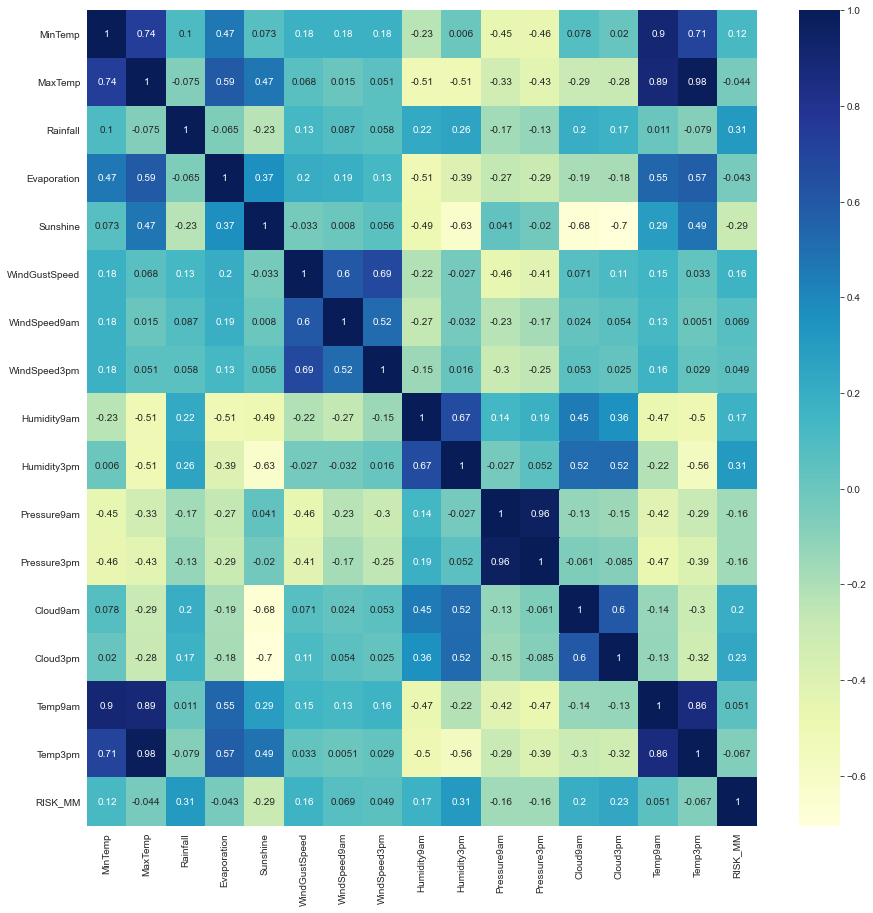

In [10]:
# Grafico Correlación de Variables Númericas
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, linecolor= 'white', cmap= 'YlGnBu')
plt.show()

### Correlación de Variables Positivas:
* Hay una alta correlación de 0.74 entre MinTemp y MaxTemp
* Correlación de 0.9 entre MinTemp y Temp9am
* Correlación de 0.71 entre MinTemp y Temp3pm
* Correlación de 0.59 MaxTemp y Evaporation
* Alta Correlación de 0.89 y 0.98 Maxtemp con Temp9am y Temp3pm
* Alta Correlación positiva 0.96 entre Pressure3pm y Presurre9pm

### Correlación de Variables Negativas:
* Correlación de -0.56 entre Temp3pm y Humidity3pm
* Correalción de -0.70 y - 0.68 Sunshine Cloud9pm Y Cloud3pm
* Correlaci


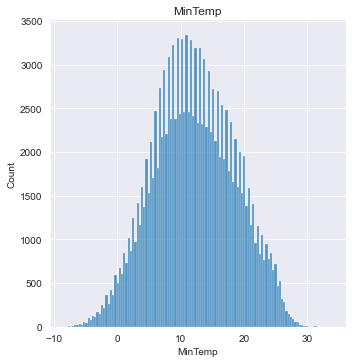

<Figure size 864x576 with 0 Axes>

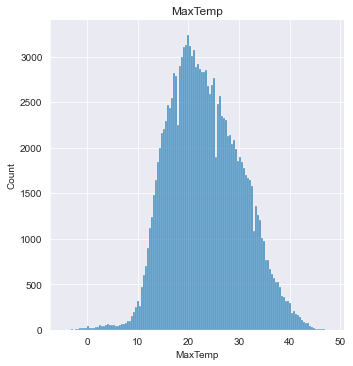

<Figure size 864x576 with 0 Axes>

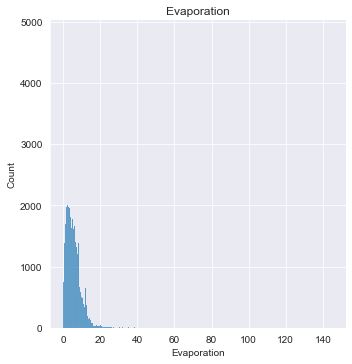

<Figure size 864x576 with 0 Axes>

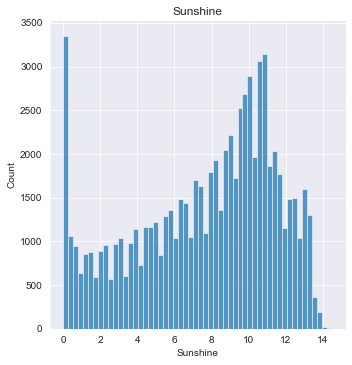

<Figure size 864x576 with 0 Axes>

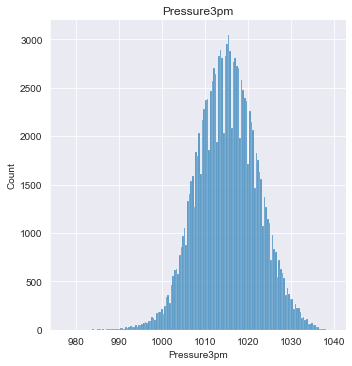

<Figure size 864x576 with 0 Axes>

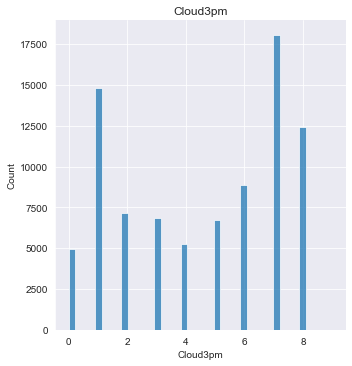

<Figure size 864x576 with 0 Axes>

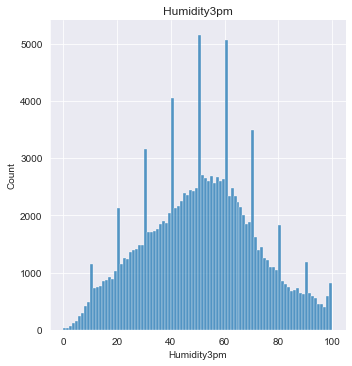

<Figure size 864x576 with 0 Axes>

In [11]:
# Gráfico Histogramas con bucle for de algunas variables.
continuous_feature = data[['MinTemp','MaxTemp','Evaporation','Sunshine','Pressure3pm','Cloud3pm','Humidity3pm']]

for feature in continuous_feature:
    sns.displot(data[feature])
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.figure(figsize=(12,8))
    plt.show()

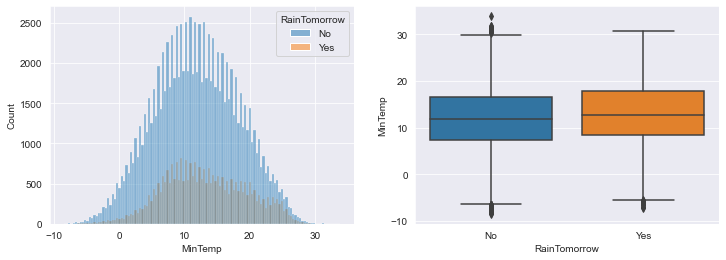

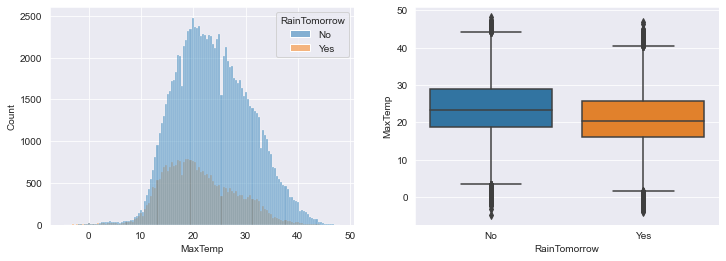

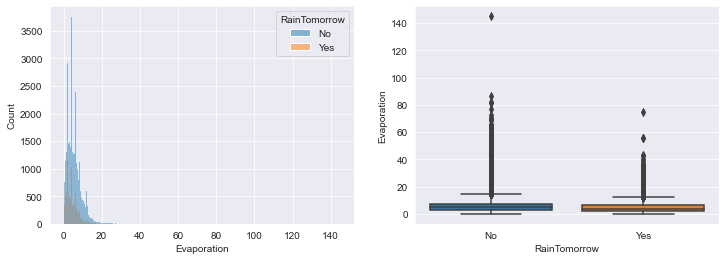

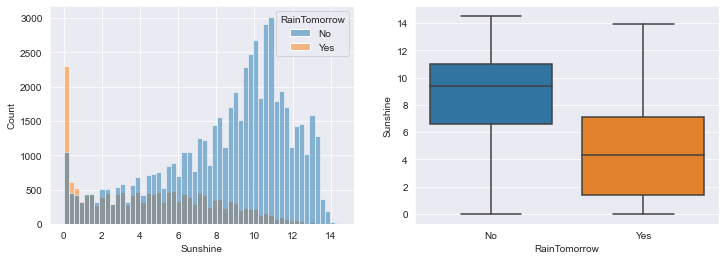

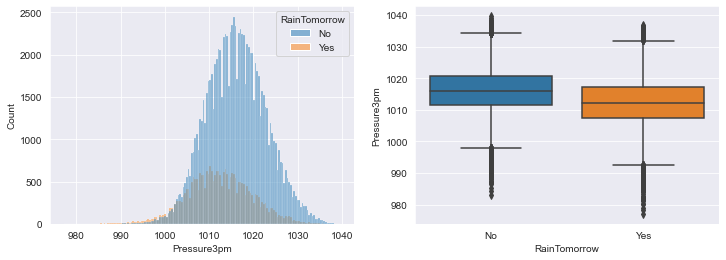

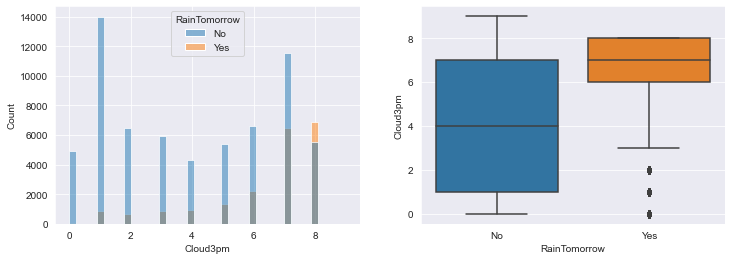

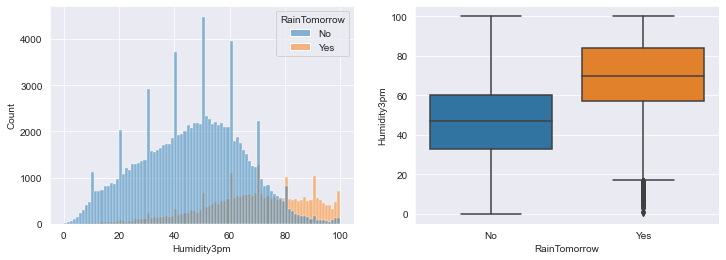

In [12]:
# Gráficos Distribuciones y Boxplot, en función de si lloverá mañana o no.
for feature in continuous_feature:
    plt.figure(figsize = (12,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data=data, x = feature ,  hue = 'RainTomorrow')
    
    plt.subplot(1,2,2)
    sns.boxplot( data =data, y = feature, x = 'RainTomorrow')
    
    plt.show()

In [13]:
# Se escoge Sydney como ciudad para predecir la temperatura 
Sydney = data[data['Location']=='Sydney']
Sydney['Date'] = pd.to_datetime(Sydney['Date'])
Sydney.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
29497 2008-02-01   Sydney     19.5     22.4      15.6          6.2       0.0   
29498 2008-02-02   Sydney     19.5     25.6       6.0          3.4       2.7   
29499 2008-02-03   Sydney     21.6     24.5       6.6          2.4       0.1   
29500 2008-02-04   Sydney     20.2     22.8      18.8          2.2       0.0   
29501 2008-02-05   Sydney     19.7     25.7      77.4          NaN       0.0   

      WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
29497         NaN            NaN          S  ...        84.0       1017.6   
29498         NaN            NaN          W  ...        73.0       1017.9   
29499         NaN            NaN        ESE  ...        86.0       1016.7   
29500         NaN            NaN        NNE  ...        90.0       1014.2   
29501         NaN            NaN        NNE  ...        74.0       1008.3   

       Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
29497       1017.4       8.0       8.0     20.7     20.9        Yes      6.0   
29498       1016.4       7.0       7.0     22.4     24.8        Yes      6.6   
29499       1015.6       7.0       8.0     23.5     23.0        Yes     18.8   
29500       1011.8       8.0       8.0     21.4     20.9        Yes     77.4   
29501       1004.8       8.0       8.0     22.5     25.5        Yes      1.6   

       RainTomorrow  
29497           Yes  
29498           Yes  
29499           Yes  
29500           Yes  
29501           Yes  

[5 rows x 24 columns]

In [14]:
# Breve análisis descriptivo de la columna Temp3pm
Sydney['Temp3pm'].describe()

count    3333.000000
mean       21.533333
std         4.303737
min        10.200000
25%        18.400000
50%        21.300000
75%        24.500000
max        44.700000
Name: Temp3pm, dtype: float64

* La serie tiene un periodo del 2008 y 2017.
* Podemos ver como hay 2791 observaciones, la temperatura media en Sydeny ha sido de 21.4 grados.
* El máximo histórico registrado fue de 44.7 grados y el mínimo de 10.2 grados. 

In [15]:
# Gráficos con Plotly
fig = px.line(Sydney, x='Date', y="Temp3pm", title= 'Evolución Temperatura Sydney 2008-2017')
fig.show()

En cuanto a la evolución de la temperatura en Sydney, se puede ver que es una seria estacionaria
pues la media y la variabilidad se muestran graficamente constantes a lo largo del tiempo.
Por otro lado, es una seria estacional pues presenta un patron sistematico que se repite a lo largo de la serie

In [16]:
# Filtrar por año <= 2015 
Sydney['Year'] = Sydney['Date'].apply(lambda x: x.year)
Sydney = Sydney[Sydney['Year']<=2015]

In [17]:
# Evolución de la temperatura hasta 2015 
fig = px.line(Sydney, x='Date', y="Temp3pm", title= 'Evolución Temperatura Sydney 2008-2015')
fig.show()

En esta ocasión en el gráfico  se filtran los datos desde 2015 hacia atrás, con el objetivo de hacer predicciones de los años restantes.

In [18]:
# Para el forecasting dejamos solo la columna Fecha y la target que en este caso es la Temperatura a las 3pm
datos = Sydney[['Date','Temp3pm']]
datos.dropna(inplace = True) # Borramos observaciones con Na´s
datos.columns = ['ds', 'y'] 

In [19]:
datos.head(10)

ds     y
29497 2008-02-01  20.9
29498 2008-02-02  24.8
29499 2008-02-03  23.0
29500 2008-02-04  20.9
29501 2008-02-05  25.5
29502 2008-02-06  26.0
29503 2008-02-07  22.3
29504 2008-02-08  21.1
29505 2008-02-09  16.5
29506 2008-02-10  23.3

## Train Model with Neural Prophet


In [20]:
# Creo el modelo Neural Prophet y entreno el modelo
m = NeuralProphet()
model = m.fit(datos, freq='D', epochs=1000)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.26E-02, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.80E-02, min: 1.19E+00


INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.80E-02, min: 1.02E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.94E-02
Epoch[1000/1000]: 100%|███████| 1000/1000 [01:40<00:00,  9.97it/s, SmoothL1Loss=0.0142, MAE=2.19, RMSE=2.96, RegLoss=0]


#  Univariate Forecast


In [21]:
# Se realizan las Predicciones del modelo
future = m.make_future_dataframe(datos, periods=900, n_historic_predictions=len(datos))
forecast = m.predict(future)
forecast.head(10)

ds     y      yhat1  residual1      trend  season_yearly  \
0 2008-02-01  20.9  24.556114   3.656114  20.319359       4.154953   
1 2008-02-02  24.8  24.418983  -0.381017  20.321980       4.119421   
2 2008-02-03  23.0  24.388638   1.388638  20.324600       4.081967   
3 2008-02-04  20.9  24.342911   3.442911  20.327221       4.042979   
4 2008-02-05  25.5  24.232136  -1.267864  20.329840       4.002846   
5 2008-02-06  26.0  24.172195  -1.827805  20.332458       3.961953   
6 2008-02-07  22.3  24.464355   2.164355  20.335079       3.920678   
7 2008-02-08  21.1  24.298895   3.198895  20.337700       3.879391   
8 2008-02-09  16.5  24.156349   7.656349  20.340321       3.838444   
9 2008-02-10  23.3  24.123184   0.823184  20.342941       3.798171   

   season_weekly  
0       0.081803  
1      -0.022415  
2      -0.017929  
3      -0.027288  
4      -0.100550  
5      -0.122219  
6       0.208598  
7       0.081803  
8      -0.022415  
9      -0.017929

* En la tabla de arriba podemos ver la fecha , la y que es el valor real de la temperatura.

* yhat1 que corresponde a la predicción que ha hecho nuestro modelo.

* Así mismo,los valores de la tendencia, estacionalidad anual y semanal.

Text(0.5, 1.0, 'Forecast Temperature in Sydney')

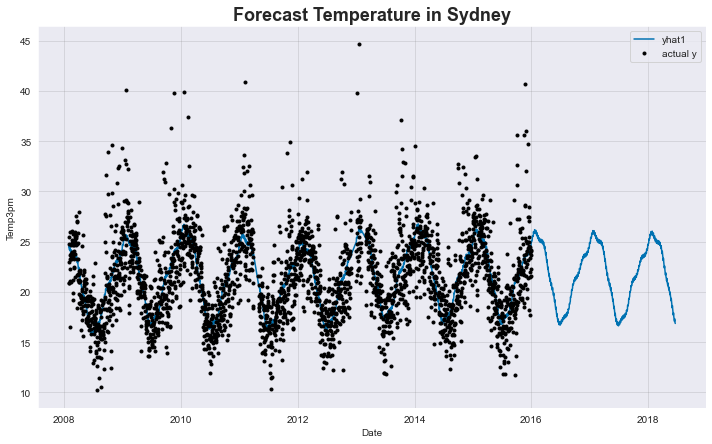

In [22]:
# Gráfico Forecast
fig, ax = plt.subplots(figsize=(10, 6))

m.plot(forecast, xlabel="Date", ylabel="Temp3pm", ax=ax)

ax.set_title("Forecast Temperature in Sydney", fontsize=18, fontweight="bold")

En el gráfico se puede ver la evolución que ha tenido la temperatura comparandose el valor real y el predictivo.

La parte la linea azul corresponde al valor predictivo del modelo y los puntos negros al valor real.

Asi mismo, se ha hecho una predicción de la temperatura desde 2016 hasta mediados del 2018.

In [23]:
# Últimas observaciones
forecast.tail()

ds   y      yhat1  residual1      trend  season_yearly  \
3686 2018-06-14 NaN  17.338219        NaN  21.502277      -4.372656   
3687 2018-06-15 NaN  17.145220        NaN  21.502098      -4.438681   
3688 2018-06-16 NaN  16.979874        NaN  21.501919      -4.499630   
3689 2018-06-17 NaN  16.928473        NaN  21.501741      -4.555340   
3690 2018-06-18 NaN  16.868591        NaN  21.501564      -4.605683   

      season_weekly  
3686       0.208598  
3687       0.081803  
3688      -0.022415  
3689      -0.017929  
3690      -0.027288

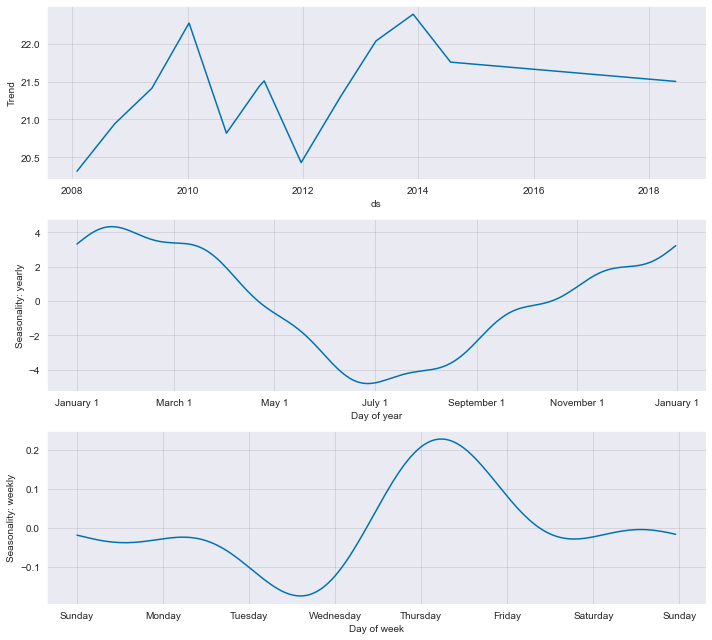

In [24]:
## Plot de los componentes 
plt2 = m.plot_components(forecast)

En cuanto a la estacionalidad anual se puede ver como de Enero a Julio la temperatura va cayendo pues coincide con la epoca
de fin de verano e inicios del invierno. 
Por otro lado a partir de Julio se llega al minimo y la temperatura comienza de nuevo a subir siendo basicamente de Septiembre
a Enero la epoca veraniega.

Text(0.5, 1.0, 'Model Loss MAE')

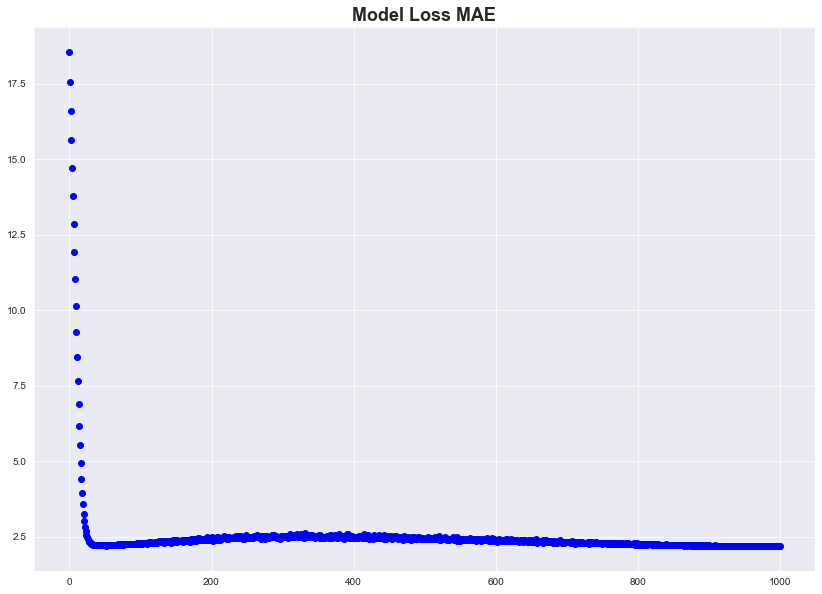

In [25]:
# Plot Model Loss MAE
fig, ax = plt.subplots(figsize=(14, 10))

ax.plot(model["MAE"], 'ob', linewidth=6, label="Training Loss")

ax.set_title("Model Loss MAE", fontsize=18, fontweight="bold")

En el gráfico de arriba, se puede ver la evolución del MAE (Error medio)
Se puede ver como en las primeras predicciones el error medio empieza por 30 y va bajando hasta ya pasadas las 50
observaciones llega a un error medio de entre 3 y 2 grados de temperatura, manteninedose este error constante sobre ese intervalo.

Así mismo, podemos ver como en la table de abajo tanto el MAE, como RMSE parten de 29 y 36 respectivamente 
y finalmente estabilizan entre 2 y 3.

In [26]:
# Información de los errores del modelo
model

SmoothL1Loss        MAE       RMSE  RegLoss
0        0.636350  18.553780  23.001368      0.0
1        0.587614  17.570803  21.797447      0.0
2        0.540425  16.606590  20.675946      0.0
3        0.494621  15.651251  19.499031      0.0
4        0.449673  14.702309  18.398457      0.0
..            ...        ...        ...      ...
995      0.014216   2.187977   2.945160      0.0
996      0.014216   2.187984   2.961946      0.0
997      0.014215   2.187962   2.953049      0.0
998      0.014215   2.187952   2.959209      0.0
999      0.014215   2.187951   2.955087      0.0

[1000 rows x 4 columns]

# Resources

* [Neural Prophet Documentation]( https://neuralprophet.com/html/index.html)


* [Video Tutorial]( https://www.youtube.com/watch?v=mgX0Iz4q0bE)


* [GitHub Tutorial]( https://github.com/ourownstory/neural_prophet)